## Import Libraries

In [28]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

## Load the Data

In [31]:
df = pd.read_csv("C:/Users/LENOVO/OneDrive/Desktop/Tuwaiqpro/Usecase-7/final_data.csv")

In [33]:
df.shape

(10754, 22)

In [35]:
df.drop_duplicates(inplace=True)

In [37]:
df.head(10)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
5,/harry-maguire/profil/spieler/177907,Manchester United,Harry Maguire,Defender Centre-Back,194.0,30.0,68,0.037799,0.000000,0.302394,...,0.000000,0.000000,4762,148,27,1,25000000,70000000,2,0
6,/victor-lindelof/profil/spieler/184573,Manchester United,Victor Lindelöf,Defender Centre-Back,187.0,28.0,70,0.000000,0.032901,0.115153,...,0.000000,0.000000,5471,95,19,10,15000000,35000000,2,0
7,/phil-jones/profil/spieler/117996,Manchester United,Phil Jones,Defender Centre-Back,185.0,31.0,8,0.000000,0.000000,0.216346,...,0.000000,0.000000,416,932,169,7,2000000,20000000,2,0
8,/teden-mengi/profil/spieler/548470,Manchester United,Teden Mengi,Defender Centre-Back,186.0,21.0,34,0.000000,0.000000,0.130529,...,0.000000,0.000000,2758,47,13,0,2000000,2000000,2,0
9,/luke-shaw/profil/spieler/183288,Manchester United,Luke Shaw,Defender Left-Back,178.0,27.0,74,0.015374,0.169115,0.353604,...,0.000000,0.000000,5854,443,70,4,35000000,42000000,2,1


## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [41]:
# Completeness
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [43]:
# Accurecy types
df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [47]:
#rename 
df.rename(columns={
    'red cards': 'red_cards',
    'yellow cards': 'yellow_cards',
    'minutes played': 'minutes_played',
    'second yellow cards': 'second_yellow_cards',
    'goals conceded': 'goals_conceded',
    'clean sheets': 'clean_sheets'}, inplace=True)


In [49]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
print(numeric_columns)  


Index(['height', 'age', 'appearance', 'goals', 'assists', 'yellow_cards',
       'second_yellow_cards', 'red_cards', 'goals_conceded', 'clean_sheets',
       'minutes_played', 'days_injured', 'games_injured', 'award',
       'current_value', 'highest_value', 'position_encoded', 'winger'],
      dtype='object')


In [51]:
correlation_matrix = df[numeric_columns].corr()  
print(correlation_matrix['current_value'].sort_values(ascending=False))


current_value          1.000000
highest_value          0.834553
minutes_played         0.420542
appearance             0.419656
award                  0.300454
assists                0.137415
games_injured          0.135654
goals                  0.121574
days_injured           0.107686
position_encoded       0.085154
height                 0.040535
winger                 0.005034
red_cards             -0.010171
clean_sheets          -0.011684
yellow_cards          -0.011766
second_yellow_cards   -0.013889
age                   -0.050156
goals_conceded        -0.063529
Name: current_value, dtype: float64


In [53]:
# Accurecy - Outlier

# Convert categorical variables using OneHotEncoding
categorical_features = ['team']
numeric_features = ['appearance', 'minutes played', 'days_injured','assists','highest_value','award']


In [55]:
df.describe()

,height,age,appearance,goals,assists,yellow_cards,second_yellow_cards,red_cards,goals_conceded,clean_sheets,minutes_played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


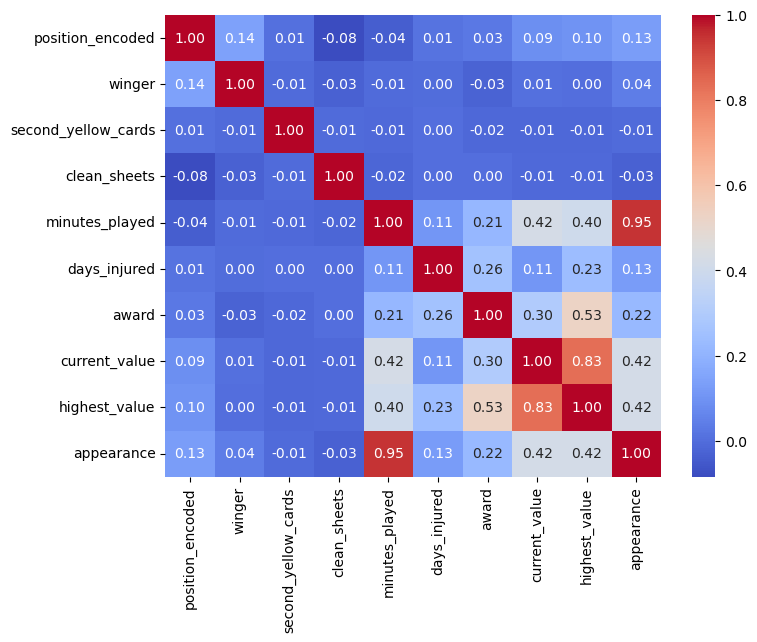

In [57]:
selected_columns = df[['position_encoded', 'winger', 'second_yellow_cards','clean_sheets','minutes_played','days_injured','award',
                      'current_value','highest_value','appearance']]  # the columns I want for corr

correlation_matrix = selected_columns.corr()

#draw heatmap 
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.show()

In [58]:
for i in categorical_features:
    print (df[i].value_counts())

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64


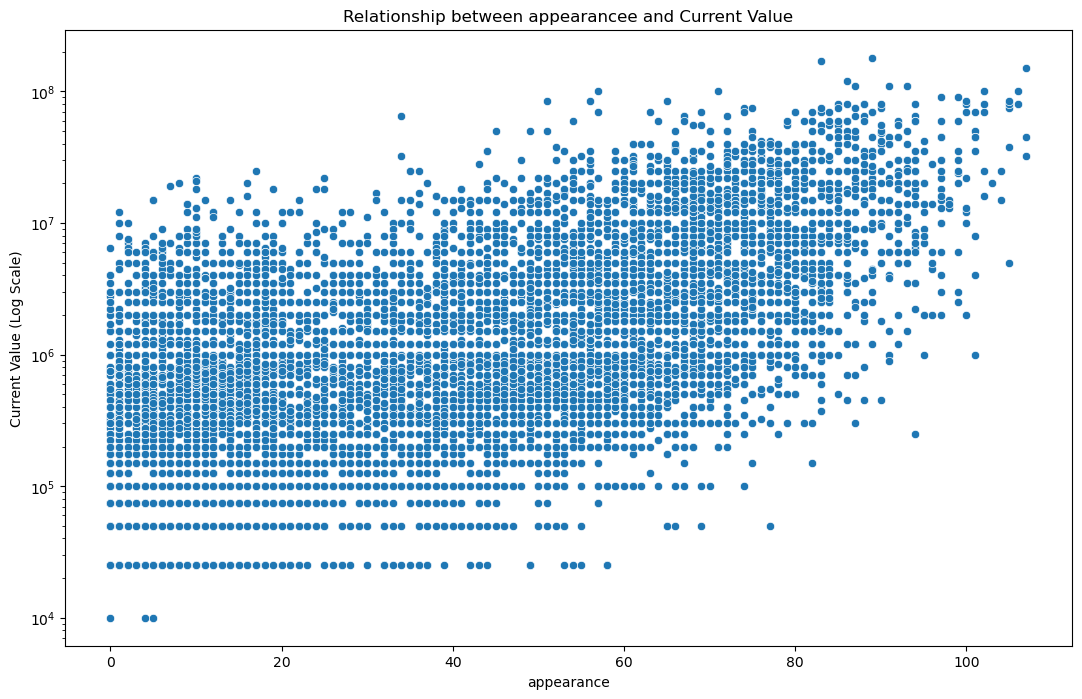

In [61]:
#here is a Positive Correlation
plt.figure(figsize=(13, 8))
sns.scatterplot(x='appearance', y='current_value', data=df)
plt.title('Relationship between appearancee and Current Value')
plt.xlabel('appearance')
plt.ylabel('Current Value (Log Scale)')
plt.yscale('log') 
plt.show()



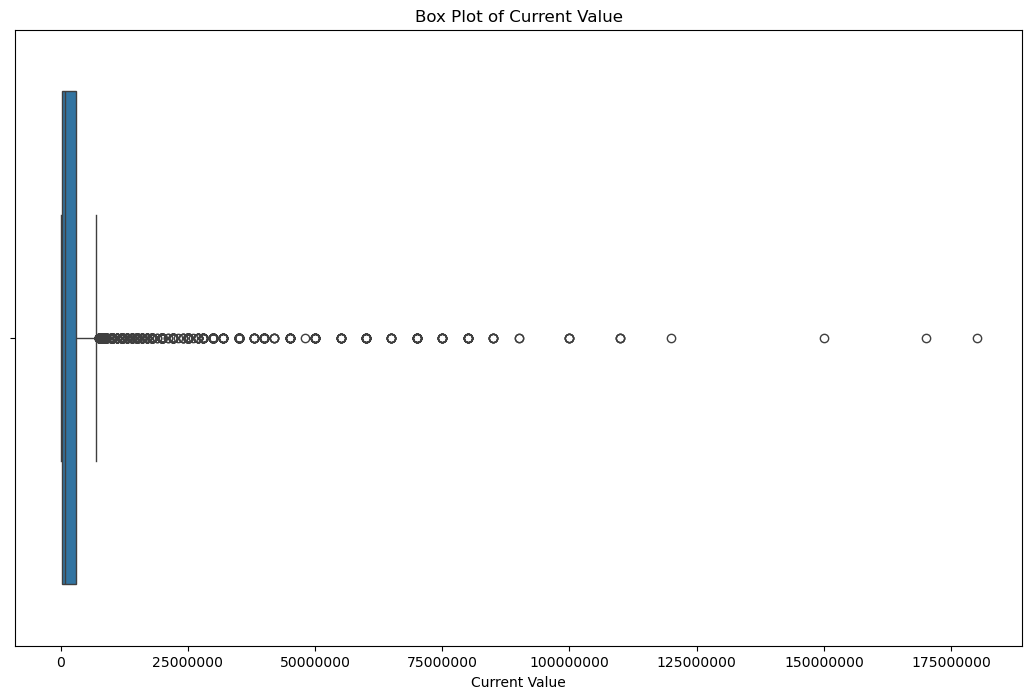

In [62]:

#Box Plot
plt.figure(figsize=(13, 8))
sns.boxplot(x=df['current_value'])
plt.xscale('linear') 
plt.ticklabel_format(style='plain', axis='x') 
plt.title('Box Plot of Current Value')
plt.xlabel('Current Value')
plt.show()


Text(0.5, 1.0, 'Distribution after Removing Outliers')

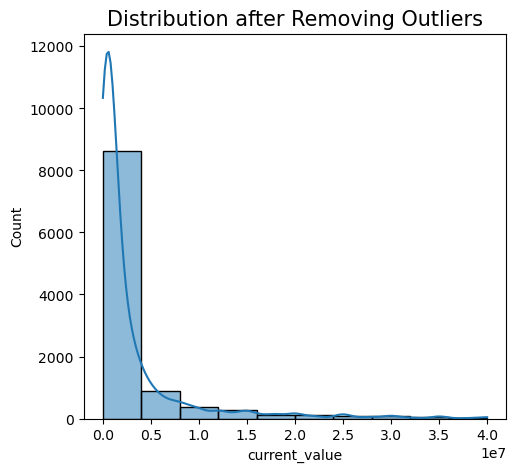

In [65]:
from scipy import stats as st

# Calculate Z-scores for 'Current Value'
zw = st.zscore(df['current_value'])

# Identify outliers based on Z-score 
df = df[np.abs(zw) <= 4]  

# Plot distributions
plt.figure(figsize=(12, 5))

# Before removing outliers
plt.subplot(1, 2, 1)
sns.histplot(df['current_value'], kde=True, bins=10)  # Use histplot 
plt.title('Distribution after Removing Outliers', fontsize=15)


In [67]:
df.shape

(10636, 22)

In [69]:
max_appearance = df['appearance'].max()
print({max_appearance})

{107}


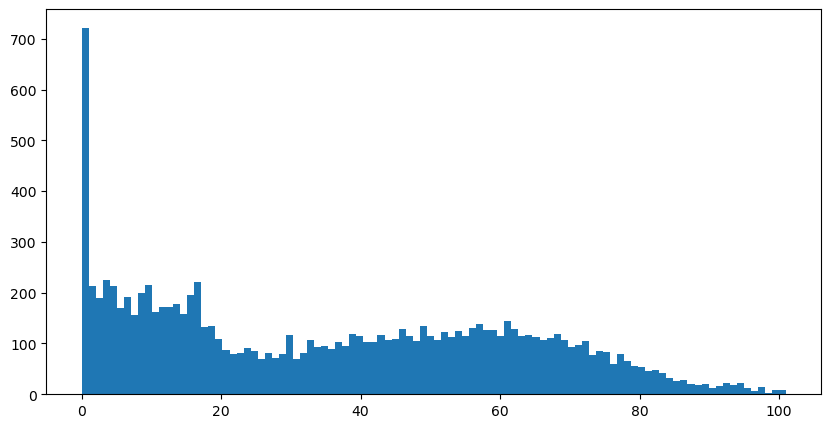

In [71]:
plt.figure(figsize=(10,5))
plt.hist(df[df['appearance']<=101]['appearance'], bins=100);

In [73]:
df = df[df['appearance']<=89]

In [75]:
df.shape

(10483, 22)

In [77]:
print(df.columns)


Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow_cards', 'second_yellow_cards', 'red_cards',
       'goals_conceded', 'clean_sheets', 'minutes_played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')


In [79]:

selected_columns = ['current_value', 'highest_value', 'appearance', 'minutes_played','team']  
df = df[selected_columns]
print(df.shape)


(10483, 5)


#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [83]:
df.head(2)

,current_value,highest_value,appearance,minutes_played,team
1,1500000,22000000,15,1304,Manchester United
2,600000,6000000,4,292,Manchester United


In [85]:
categorical_features

['team']

In [87]:
print(df.columns)


Index(['current_value', 'highest_value', 'appearance', 'minutes_played',
       'team'],
      dtype='object')


In [89]:
#one hot coding
df = pd.get_dummies(df, columns=categorical_features)

In [91]:
print(df.columns)

Index(['current_value', 'highest_value', 'appearance', 'minutes_played',
       'team_1.FC Köln', 'team_1.FC Union Berlin', 'team_1.FSV Mainz 05',
       'team_AA Argentinos Juniors', 'team_AC Ajaccio', 'team_AC Milan',
       ...
       'team_West Ham United', 'team_Western Sydney Wanderers',
       'team_Western United FC', 'team_Wigan Athletic', 'team_Wolfsberger AC',
       'team_Wolverhampton Wanderers', 'team_Yokohama F. Marinos',
       'team_Yokohama FC', 'team_Zenit St. Petersburg', 'team_Ümraniyespor'],
      dtype='object', length=378)


In [93]:
df.shape

(10483, 378)

In [95]:
df.head(2)

,current_value,highest_value,appearance,minutes_played,team_1.FC Köln,team_1.FC Union Berlin,team_1.FSV Mainz 05,team_AA Argentinos Juniors,team_AC Ajaccio,team_AC Milan,...,team_West Ham United,team_Western Sydney Wanderers,team_Western United FC,team_Wigan Athletic,team_Wolfsberger AC,team_Wolverhampton Wanderers,team_Yokohama F. Marinos,team_Yokohama FC,team_Zenit St. Petersburg,team_Ümraniyespor
1,1500000,22000000,15,1304,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,600000,6000000,4,292,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### 3. Feature selection

In [98]:
correlation = df.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value                1.000000
highest_value                0.748242
appearance                   0.429572
minutes_played               0.416192
team_Arsenal FC              0.162393
                               ...   
team_Daegu FC               -0.029549
team_Marumo Gallants FC     -0.029610
team_Al-Batin FC            -0.029795
team_Royal AM FC            -0.029871
team_Daejeon Hana Citizen   -0.030827
Name: current_value, Length: 378, dtype: float64


In [99]:
# Set the correlation threshold
threshold = 0.2  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_columns = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_columns

Index(['current_value', 'highest_value', 'appearance', 'minutes_played'], dtype='object')

In [102]:
df = df[selected_columns]
df.head()

,current_value,highest_value,appearance,minutes_played
1,1500000,22000000,15,1304
2,600000,6000000,4,292
4,40000000,80000000,63,5031
5,25000000,70000000,68,4762
6,15000000,35000000,70,5471


#### 4. Prepare train and test data

In [107]:
X = df[['highest_value', 'appearance','minutes_played']]
y = df['current_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [109]:

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [111]:
X.shape

(10483, 3)

## Buliding the Model

In [114]:
model = LinearRegression()

In [116]:
ridge_model = Ridge()  # You can adjust alpha to see different resu

In [118]:
lasso_model = Lasso()  # You can adjust alpha to see different results

In [120]:
param_grid = {
    'alpha': [0, 0.0000003, 0.0002, 0.001, 0.01, 0.5, 1, 5]  # Regularization strength
}
grid_search = GridSearchCV(estimator=ridge_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

grid_search_lasso = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

In [122]:
model = LinearRegression()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(f'R² Score: {score}')

R² Score: 0.5900212359496824


## Train the Model

In [125]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

## Test the Model

In [128]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

## Interpretation of the Model

In [131]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
highest_value,3.703439e+06
appearance,-2.133018e+04
minutes_played,1.016814e+06


In [133]:
model.coef_

array([3703438.78793553,  -21330.18478504, 1016813.97031208])

In [135]:
print(model.intercept_) 

2763876.6992606726


In [137]:
#coeff_df = pd.DataFrame(lasso_model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_df)

## Evaluating the Model 

1. Mean Square Error

In [141]:
y_base = [y_train.mean()] * len(y_test)

In [143]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base}')

Mean Squared Error of base model: 26884277002667.36


In [145]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train}')
print(f'Mean Squared Error for testing: {mse_test}')

Mean Squared Error for training: 11991966083901.768
Mean Squared Error for testing: 11015490209362.98


2. Mean Absolute Error

In [148]:
# our benchmark model
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base}')

Mean Absolute  Error of base model: 3005190.741864777


In [150]:
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute Error for training: 1755748.8731722094
Mean Absolute Error for testing: 1689225.8365297958


3. Root Mean Squared Error

In [153]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')

Root Mean Squared  Error of base model: 1733.5485980683602


In [155]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

Root Mean Squared Error for training: 3462941.82508193
Root Mean Squared Error for testing: 3318959.2057395014


4. R Square

In [158]:
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.5891280403738668
R Square for testing: 0.5900212359496824


#### Predictions vs. Real Values

In [161]:
predictions = model.predict(X_test_scaled)
#predictions

In [163]:
Real_Values = np.array(y_test)
#Real_Values

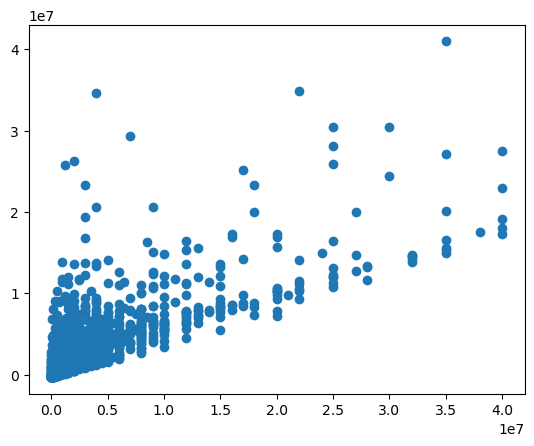

In [165]:
plt.scatter(Real_Values,predictions); 

#### Residual Histogram

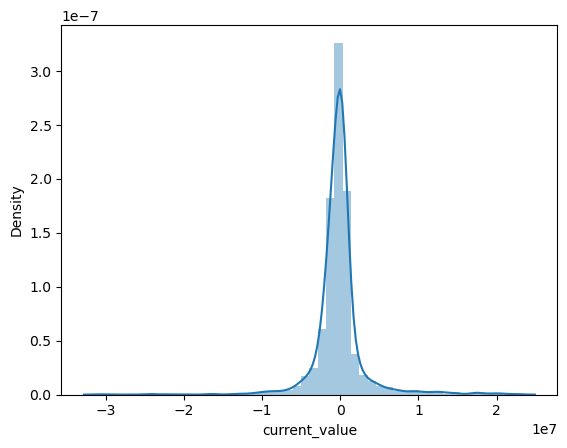

In [168]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution

accuracy

In [171]:

p35 = df['current_value'].quantile(0.35)
p75 = df['current_value'].quantile(0.75)

# Function to categorize prices
def categorize_value(value):
    if value < p35:
        return 'Cheap_Price'
    elif value < p75:
        return 'Good_Price'
    else:
        return 'High_Price'


df['price_category'] = df['current_value'].apply(categorize_value)
df.drop('current_value', axis=1, inplace=True)



# Apply the function to create a new column
print(df['price_category'].value_counts())



price_category
Good_Price     4371
Cheap_Price    3318
High_Price     2794
Name: count, dtype: int64


In [173]:
p35, p75

(400000.0, 2500000.0)

In [175]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['price_category'] = encoder.fit_transform(df['price_category']) 

In [177]:
correlation = df.corr(numeric_only=True)
#print(correlation['Price'].sort_values(ascending=False))
print(correlation['price_category'].sort_values(ascending=False))

price_category    1.000000
appearance        0.515000
highest_value     0.499108
minutes_played    0.484092
Name: price_category, dtype: float64


In [179]:
encoder = LabelEncoder()
df['price_category'] = encoder.fit_transform(df['price_category'])  

In [181]:
threshold = 0.2  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['price_category']) > \
threshold]['price_category'].index
selected_features

Index(['highest_value', 'appearance', 'minutes_played', 'price_category'], dtype='object')

In [183]:
selected_features = ['highest_value', 'appearance', 'minutes_played', 'price_category']

In [185]:
df = df[selected_features]
df.head()

,highest_value,appearance,minutes_played,price_category
1,22000000,15,1304,1
2,6000000,4,292,1
4,80000000,63,5031,2
5,70000000,68,4762,2
6,35000000,70,5471,2


In [187]:
# Prepare data
X = df.drop(['price_category'], axis=1)
y = df['price_category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [189]:
X.shape

(10483, 3)

In [191]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [193]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [195]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

In [197]:
# Each row of the model.coef_ matrix tells you how each feature affects being in the corresponding class versus any other class
coeff_df = pd.DataFrame(model.coef_[2],X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
highest_value,3.760634
appearance,0.283243
minutes_played,0.249068


In [199]:
print(model.intercept_) 

[-1.76479681  1.23279661  0.5320002 ]


In [202]:
# our benchmark model
base_model = round(df['price_category'].value_counts()[1]/df.shape[0]*100, 2)
base_model

41.7

In [204]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6752503576537912

In [206]:
y_pred_train = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy

0.6738611972334844

In [208]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[503, 150,  12],
       [237, 567,  68],
       [  0, 214, 346]], dtype=int64)

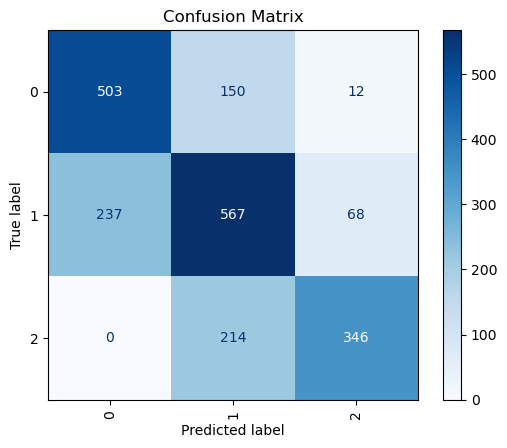

In [210]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [212]:
# Train score
precision_train = precision_score(y_train, y_pred_train, average='macro')
print(f"Precision in train: {precision_train:.2f}")

# Test score
precision_test = precision_score(y_test, y_pred, average='macro')
print(f"Precision in test: {precision_test:.2f}")

Precision in train: 0.70
Precision in test: 0.70


In [214]:
# Train score
recall_train = recall_score(y_train, y_pred_train, average='macro')
print(f"Recall in train: {recall_train:.2f}")

# Test score
recall_test = recall_score(y_test, y_pred, average='macro')
print(f"Recall in test: {recall_test:.2f}")

Recall in train: 0.67
Recall in test: 0.67


In [216]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.68


#### Buliding Model Random Forest



In [248]:
# Prepare data
X = df.drop(['price_category'], axis=1)
y = df['price_category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

In [250]:
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()

In [252]:
param_grid = {
    'max_depth': [4, 5, 6, 7, 8],   # adjust tree depth
    'n_estimators':[35, 40, 50, 60]      # adjust num trees to build before taking the maximum voting or averages of predictions
}
grid_search = GridSearchCV(estimator=rf_classifier,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro', 
                           verbose=1)

In [254]:

X = df[['highest_value', 'appearance', 'minutes_played']] 
y = df['price_category'] 

In [258]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [266]:
# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [268]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [35, 40, 50, 60]},
             scoring='f1_macro', verbose=1)

In [270]:
grid_search.best_params_


{'max_depth': 8, 'n_estimators': 50}

In [275]:
best_model = grid_search.best_estimator_


In [277]:
# Predict and evaluate the model
y_pred_dt = dt_classifier.predict(X_test)
y_pred_rf = rf_classifier.predict(X_test)
y_pred_rf_g = best_model.predict(X_test)

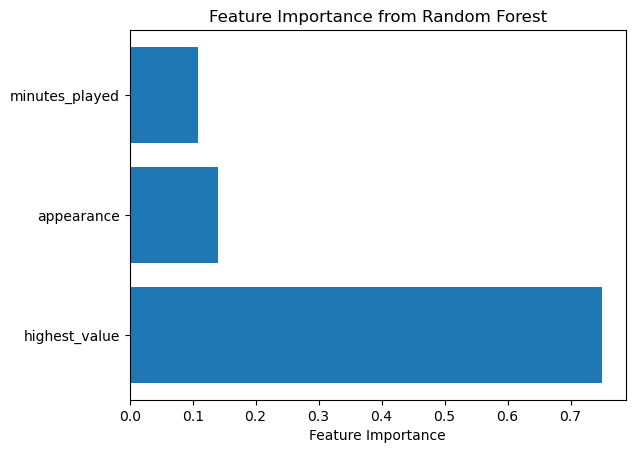

In [279]:
# Feature importance from Random Forest
feature_importances = best_model.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()